In [1]:
from datetime import datetime
import datetime as dt
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import pandas as pd
import pytz
import numpy as np
import os
    #Fetching currency pairs data mt5
#Display MetaTrader5 package information
print(f"MetaTrader5 package version: {mt5.__version__}")
print(f"MetaTrader5 author: {mt5.__author__}")

# Initialize connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Set the time zone to UTC
timezone = pytz.timezone("Etc/UTC")
lst_ = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']

dict_ = {}

for symbol in lst_:
    # Define the date and time range for historical data (weekly version)
    days_offset = dt.timedelta(weeks=4)
    local_time = dt.datetime.today()

    # Calculate the start and end dates for the weekly range in UTC
    utc_from = local_time - days_offset
    utc_to = local_time

    # Get historical price data for the symbol on a daily timeframe
    timeframe = mt5.TIMEFRAME_D1
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)

    # Check if data retrieval was successful
    if rates is not None and len(rates) > 0:
        # Create a DataFrame from the obtained data
        df = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Store the DataFrame in the dictionary
        dict_[f'df_30_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

# Shut down the connection to the MetaTrader 5 terminal
mt5.shutdown()

# Display the first 10 elements of the obtained data for each currency pair
for key, df in dict_.items():
    print(f"\nData for {key}:")
    print(df.head(10))


MetaTrader5 package version: 5.0.45
MetaTrader5 author: MetaQuotes Ltd.

Data for df_30_EURUSD:
        time     open     high      low    close  tick_volume  spread  \
0 2023-11-06  1.07234  1.07563  1.07162  1.07170        75439       0   
1 2023-11-07  1.07063  1.07227  1.06642  1.06998        82021       0   
2 2023-11-08  1.06989  1.07161  1.06593  1.07087        82851       0   
3 2023-11-09  1.06971  1.07255  1.06601  1.06681        93227       0   
4 2023-11-10  1.06655  1.06928  1.06562  1.06839        81349       0   
5 2023-11-13  1.06830  1.07062  1.06652  1.06986        68161       0   
6 2023-11-14  1.06920  1.08875  1.06915  1.08787        85071       0   
7 2023-11-15  1.08758  1.08857  1.08315  1.08466        85174       0   
8 2023-11-16  1.08461  1.08956  1.08302  1.08530        83243       0   
9 2023-11-17  1.08467  1.09139  1.08247  1.09131        84797       0   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0 

        time     open     high      low    close  tick_volume  spread  \
0 2023-11-06  0.81088  0.81193  0.80478  0.80498        25823      26   
1 2023-11-07  0.80493  0.80647  0.80097  0.80348        25774      24   
2 2023-11-08  0.80198  0.80488  0.80103  0.80153        24873      26   
3 2023-11-09  0.80093  0.80738  0.80008  0.80183        24595      27   
4 2023-11-10  0.80053  0.80298  0.79993  0.80083        24344      27   
5 2023-11-13  0.79625  0.80223  0.79625  0.79843        19866      28   
6 2023-11-14  0.79818  0.81048  0.79399  0.81003        27273      24   
7 2023-11-15  0.81008  0.81533  0.80783  0.81303        33785      26   
8 2023-11-16  0.81098  0.81385  0.80318  0.80343        31781      25   
9 2023-11-17  0.80348  0.80583  0.80123  0.80453        27557      26   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0  


In [2]:
df_close = pd.concat([dict_[i]['close'] for i in dict_.keys() if 'JPY' not in i], axis='columns')

In [3]:
df_close.columns = [i for i in lst_ if 'JPY' not in i]

In [4]:
corr_close = df_close.corr()
corr_close.to_excel('C:\\Users\\morara\\correlation\\Corr_Monthly.xlsx')

In [5]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]>0.75].dropna()

with open('C:/Users/morara/correlation/High_Monthlycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

In [6]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]<0.3].dropna()

with open('C:/Users/morara/correlation/Negative_Monthlycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

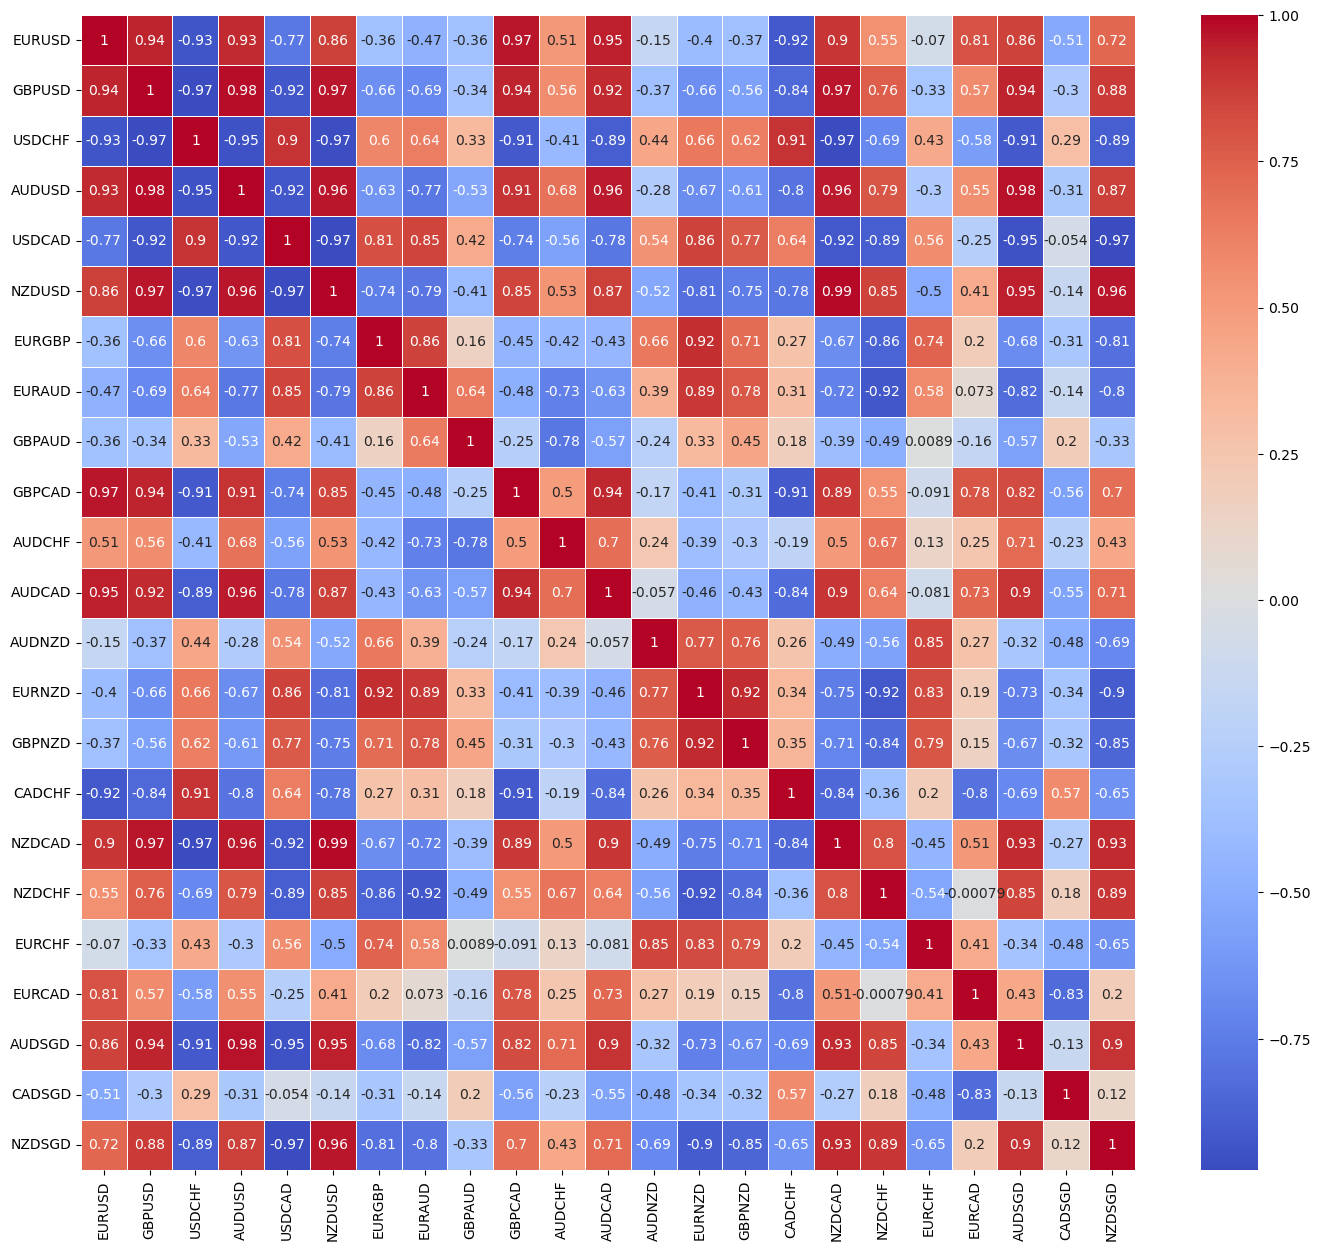

In [7]:
fig, ax = plt.subplots(figsize=(17,15))
hm = sns.heatmap(corr_close, annot=True,cmap='coolwarm', linewidths=0.5, ax=ax)
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'my_Corr-monthly.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();
